In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import time
from math import radians, cos, sin, asin, sqrt

In [2]:
# functions written specifically to analyze cyclistic bike share data
from cyclistic_analysis_functions import *

In [3]:
# Bikeshare Data from January 2021 (202101) - January 2022 (202201)
date_indices = [
    '202101', '202102', '202103', '202104', '202105', '202106',
    '202107', '202108', '202109', '202110', '202111', '202112', '202201']

month_df_dict = {}

for index in date_indices:
    month_df_dict[index] = load_data(index)

In [4]:
# Generate addition variables
for index in month_df_dict:
    print(index)
    df = month_df_dict[index]
    generate_columns_pack(df)
    print(df.shape)

202101
(96834, 17)
202102
(49622, 17)
202103
(228496, 17)
202104
(337230, 17)
202105
(531633, 17)
202106
(729595, 17)
202107
(822410, 17)
202108
(804352, 17)
202109
(756147, 17)
202110
(631226, 17)
202111
(359978, 17)
202112
(247540, 17)
202201
(103770, 17)


In [5]:
for index in month_df_dict:
    print(index)
    df = month_df_dict[index]
    clean_data(df)
    print(df.shape)

202101
(96834, 17)
202102
(49622, 17)
202103
(228496, 17)
202104
(337230, 17)
202105
(531633, 17)
202106
(729595, 17)
202107
(822410, 17)
202108
(804352, 17)
202109
(756147, 17)
202110
(631226, 17)
202111
(359978, 17)
202112
(247540, 17)
202201
(103770, 17)


In [44]:
month_stats_dict = {}

for index in month_df_dict:
    print(index)
    df = month_df_dict[index]
    month_stats_dict[index] = generate_overall_summary_dict(df, index)

202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201


### Year Over Year
Analysis of the monthly datasets combined from Jan 2021 to Dec 2021

In [13]:
df = month_df_dict['202101']
for item in date_indices[1:-1]:
    print(item)
    df = combine_data(df, item)

202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112


In [15]:
df = df.sort_values(by=['started_at']).reset_index()
df = df.drop(['index'], axis=1)

In [18]:
casual = df.loc[df['member_casual'] == 'casual']

In [19]:
member = df.loc[df['member_casual'] == 'member']

In [21]:
print(f'YoY {len(df)}')
print(f'Casual {len(casual)}, {round(len(casual) / len(df) * 100, 2)} %')
print(f'Member {len(member)}, {round(len(member) / len(df) * 100, 2)} %')

YoY 5595063
Casual 2529005, 45.2 %
Member 3066058, 54.8 %


### Monthly Analyis

In [23]:
month_cnt_overall = []
month_cnt_casual = []
month_cnt_member = []
month_cnt_leisure = []
month_cnt_non_leisure = []


for index in date_indices:
    month_cnt_overall.append(month_stats_dict[index]['cnt_pcnt_stats']['overall']['count'])
    month_cnt_casual.append(month_stats_dict[index]['cnt_pcnt_stats']['casual']['count'])
    month_cnt_member.append(month_stats_dict[index]['cnt_pcnt_stats']['member']['count'])
    month_cnt_leisure.append(month_stats_dict[index]['cnt_pcnt_stats']['leisure']['count'])
    month_cnt_non_leisure.append(month_stats_dict[index]['cnt_pcnt_stats']['non_leisure']['count'])
    
month_cnt_dict = {'overall': month_cnt_overall,
                  'casual': month_cnt_casual,
                  'member': month_cnt_member} 

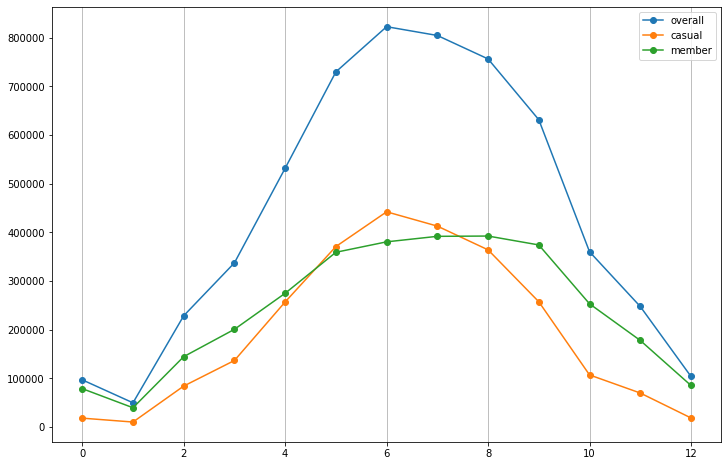

In [24]:
plot_stuff(month_cnt_dict)

In [79]:
month_stats_mean_max = {}

for item in date_indices:
    max_dist = month_stats_dict[item]['percentile_dict']['overall'].iloc[0, -5:-4][0]
    mean_dist = month_stats_dict[item]['percentile_dict']['overall'].iloc[0, -4:-3][0]
    max_time = month_stats_dict[item]['percentile_dict']['overall'].iloc[2, -5:-4][0]
    mean_time = month_stats_dict[item]['percentile_dict']['overall'].iloc[2, -4:-3][0]
    month_stats_mean_max[item] = {'mean_dist': mean_dist, 'max_dist': max_dist, 'mean_time': mean_time, 'max_time': max_time}

pd.DataFrame(month_stats_mean_max).T

,mean_dist,max_dist,mean_time,max_time
202101,1.2,14.14,0 days 0:15:16,13 days 18:25:55
202102,1.23,14.51,0 days 0:24:25,20 days 22:09:14
202103,1.31,18.69,0 days 0:22:51,22 days 0:01:39
202104,1.33,18.76,0 days 0:24:08,33 days 4:16:42
202105,1.36,21.0,0 days 0:26:02,37 days 10:41:36
202106,1.4,19.9,0 days 0:26:04,38 days 20:24:09
202107,1.42,20.02,0 days 0:24:12,34 days 2:27:09
202108,1.42,19.83,0 days 0:21:38,28 days 21:49:10
202109,1.41,19.27,0 days 0:20:30,22 days 19:38:32
202110,1.32,17.97,0 days 0:19:05,28 days 6:25:01


In [92]:
# Bikeshare Data from January 2021 (202101) - January 2022 (202201)
date_strings = ['Jan \'21', 'Feb \'21', 'Mar \'21', 'Apr \'21', 'May \'21', 'Jun \'21', 'Jul \'21', 'Aug \'21', 'Sep \'21', 'Oct \'21', 'Nov \'21', 'Dec \'21', 'Jan \'22']

In [94]:
month_stats_wkd_cnt_dict = {}
for i, item in enumerate(date_indices):
    key_str = date_strings[i]
    month_stats_wkd_cnt_dict[key_str] = month_stats_dict[item]['wkd_dict']['overall']['count'].to_list()

month_stats_wkd_cnt_dict

{"Jan '21": [13223, 12451, 13302, 14316, 15483, 16323, 11736],
 "Feb '21": [4590, 6735, 7736, 7073, 8090, 10014, 5384],
 "Mar '21": [34825, 34000, 31669, 21466, 25657, 45252, 35627],
 "Apr '21": [43761, 52226, 37345, 40436, 58724, 54385, 50353],
 "May '21": [76001, 52011, 62596, 58542, 66219, 112002, 104262],
 "Jun '21": [78943, 109620, 113526, 90796, 100642, 122311, 113757],
 "Jul '21": [94819, 97786, 100092, 121275, 136188, 162760, 109490],
 "Aug '21": [110011, 110923, 92252, 101667, 111686, 135055, 142758],
 "Sep '21": [92627, 83822, 115144, 122160, 102945, 124147, 115302],
 "Oct '21": [63715, 84646, 84585, 69450, 99327, 128723, 100780],
 "Nov '21": [59855, 67299, 53153, 42640, 43109, 49919, 44003],
 "Dec '21": [30218, 28386, 44742, 47767, 42438, 30156, 23833],
 "Jan '22": [15803, 16149, 15174, 16554, 13811, 14770, 11509]}

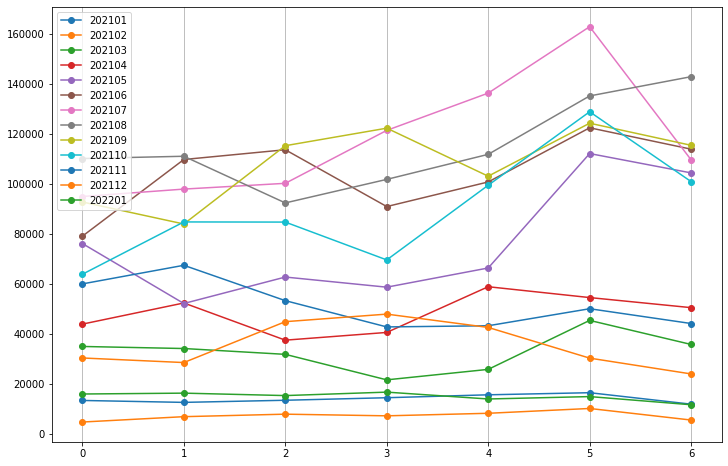

In [63]:
plot_stuff(month_stats_wkd_cnt_dict)

In [77]:
for item in date_indices:
    print(item)
    print(round(len(month_df_dict[item]) / 5595063 * 100, 2), '%')

202101
1.73 %
202102
0.89 %
202103
4.08 %
202104
6.03 %
202105
9.5 %
202106
13.04 %
202107
14.7 %
202108
14.38 %
202109
13.51 %
202110
11.28 %
202111
6.43 %
202112
4.42 %
202201
1.85 %


## Visaulizations

In [86]:
month_counts_df = pd.DataFrame(month_cnt_dict)
month_counts_df.to_csv('user_type_counts_by_month.csv', index=False)

In [95]:
month_wkd_counts_df = pd.DataFrame(month_stats_wkd_cnt_dict)
month_wkd_counts_df.to_csv('weekday_counts_by_month.csv', index=False)